# Linear Regression Lab

# Part A. Linear Regression Using `scikit-learn`

## Import required python modules 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, max_error, r2_score

sns.set()

## Simple linear regression

In [2]:
ads = pd.read_csv("https://www.palmetto.clemson.edu/dsci/datasets/isl/Advertising.csv")

train_data, test_data = train_test_split(ads, test_size=0.33, random_state=6300)


response="sales"

for predictor in ["TV", "radio", "newspaper"]:
    X = train_data[predictor][:, np.newaxis]
    y = train_data[response]

    model = LinearRegression(fit_intercept=True)

    model.fit(X, y)

    X_test = test_data[predictor][:, np.newaxis]
    y_test= test_data[response]
    y_pred = model.predict(X_test)

    print("#"*5, "Simple Linear Regression {}~{}".format(response, predictor))
    print("Model slopes: ", model.coef_, "Model intercept:", model.intercept_)
    print("explained variance: ", explained_variance_score(y_test, y_pred))
    print("R2: ",r2_score(y_test, y_pred))
    print("Max error: ", max_error(y_test, y_pred))
    print()

##### Simple Linear Regression sales~TV
Model slopes:  [0.0461283] Model intercept: 7.192974546662792
explained variance:  0.6837600019638527
R2:  0.6829956917434524
Max error:  7.332107232647996

##### Simple Linear Regression sales~radio
Model slopes:  [0.22302983] Model intercept: 9.480069591860694
explained variance:  0.19326257251340118
R2:  0.04698316580671735
Max error:  16.71205095136294

##### Simple Linear Regression sales~newspaper
Model slopes:  [0.05284629] Model intercept: 12.916196630542979
explained variance:  0.0336411095085406
R2:  -0.056907573851255666
Max error:  11.874828571392348



## Multiple linear regression

In [3]:
ads = pd.read_csv("https://www.palmetto.clemson.edu/dsci/datasets/isl/Advertising.csv")

train_data, test_data = train_test_split(ads, test_size=0.33, random_state=6300)


response="sales"

for predictor in [["TV", "radio", "newspaper"], ["TV", "radio"], ["TV", "newspaper"], ["radio", "newspaper"]]:
    X = train_data[predictor]
    y = train_data[response]

    model = LinearRegression(fit_intercept=True)

    model.fit(X, y)

    X_test = test_data[predictor]
    y_test= test_data[response]
    y_pred = model.predict(X_test)

    print("#"*5, "Simple Linear Regression {}~{}".format(response, predictor))
    print("Model slopes: ", model.coef_, "Model intercept:", model.intercept_)
    print("explained variance: ", explained_variance_score(y_test, y_pred))
    print("R2: ",r2_score(y_test, y_pred))
    print("Max error: ", max_error(y_test, y_pred))
    print()

##### Simple Linear Regression sales~['TV', 'radio', 'newspaper']
Model slopes:  [ 0.04336842  0.20779768 -0.0059267 ] Model intercept: 3.0586904818889202
explained variance:  0.850194607971932
R2:  0.8486539150256296
Max error:  9.66627404802651

##### Simple Linear Regression sales~['TV', 'radio']
Model slopes:  [0.0433361  0.20438689] Model intercept: 2.953841998650651
explained variance:  0.852645453584713
R2:  0.8514485135348984
Max error:  9.477898300580112

##### Simple Linear Regression sales~['TV', 'newspaper']
Model slopes:  [0.04553275 0.04473111] Model intercept: 5.867723680783119
explained variance:  0.7108210394153318
R2:  0.7078027923769661
Max error:  6.6544985063777915

##### Simple Linear Regression sales~['radio', 'newspaper']
Model slopes:  [ 0.22433554 -0.00225964] Model intercept: 9.521899801253687
explained variance:  0.1922329706933208
R2:  0.044516870256274155
Max error:  16.785928336658216



## Varance in coefficient estimate

In [4]:
ads = pd.read_csv("https://www.palmetto.clemson.edu/dsci/datasets/isl/Advertising.csv")


train_data, test_data = train_test_split(ads, test_size=0.33, random_state=6300)


response="sales"

predictor= ["TV", "radio"]
perf = {}
for i in range(100):
    train_data, test_data = train_test_split(ads, test_size=0.33)
    
    X = train_data[predictor]
    y = train_data[response]

    model = LinearRegression(fit_intercept=True)

    model.fit(X, y)

    X_test = test_data[predictor]
    y_test= test_data[response]
    y_pred = model.predict(X_test)
    
    perf[i] = {
        "intercep": model.intercept_, 
        "slope_tv": model.coef_[0],
        "slope_radio": model.coef_[1],
        "explained_variance": explained_variance_score(y_test, y_pred),
        "R^2": r2_score(y_test, y_pred)
              }
perf_df = pd.DataFrame(perf).T

In [5]:
perf_df.describe()

,intercep,slope_tv,slope_radio,explained_variance,R^2
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.928809,0.045825,0.186611,0.897601,0.895233
std,0.204090,0.001136,0.007347,0.024114,0.023504
min,2.123437,0.042927,0.168955,0.805548,0.802435
25%,2.783390,0.045062,0.182364,0.884996,0.884016
50%,2.944124,0.045935,0.186786,0.900107,0.898782
75%,3.072894,0.046640,0.191119,0.912170,0.911774
max,3.358195,0.048845,0.205120,0.943617,0.936441


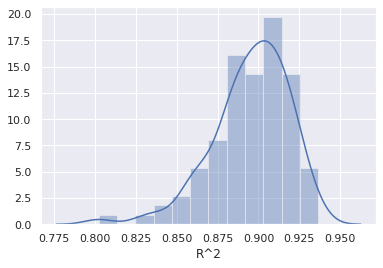

In [6]:
sns.distplot(perf_df["R^2"])

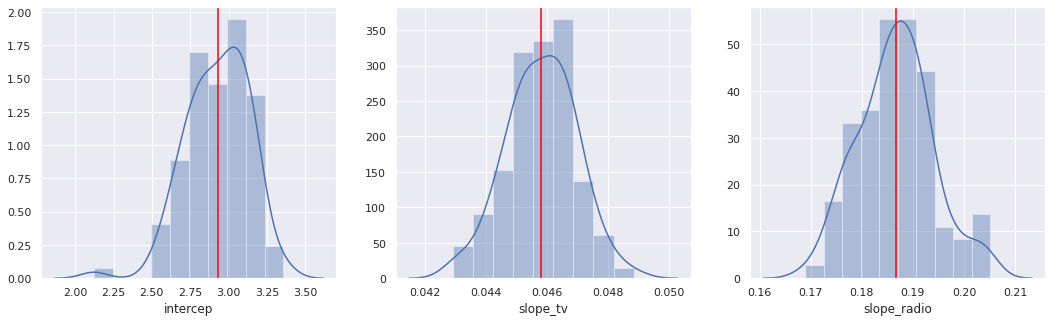

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, coefficient in enumerate(["intercep", "slope_tv", "slope_radio"]):
    sns.distplot(perf_df[coefficient], ax=axes[i])
    axes[i].axvline(perf_df[coefficient].mean(), axes[i].get_ylim()[0], axes[i].get_ylim()[1], color="red")

## Add interaction term

In [8]:
ads = pd.read_csv("https://www.palmetto.clemson.edu/dsci/datasets/isl/Advertising.csv")

ads["TV*radio"] = ads["TV"] * ads["radio"]

response="sales"

predictor= ["TV", "radio", "TV*radio"]
perf = {}
for i in range(100):
    train_data, test_data = train_test_split(ads, test_size=0.33)
    
    X = train_data[predictor]
    y = train_data[response]

    model = LinearRegression(fit_intercept=True)

    model.fit(X, y)

    X_test = test_data[predictor]
    y_test= test_data[response]
    y_pred = model.predict(X_test)
    
    perf[i] = {
        "intercep": model.intercept_, 
        "slope_tv": model.coef_[0],
        "slope_radio": model.coef_[1],
        "slope_tv*radio": model.coef_[1],
        "explained_variance": explained_variance_score(y_test, y_pred),
        "R^2": r2_score(y_test, y_pred)
              }
perf_df = pd.DataFrame(perf).T

In [9]:
perf_df.describe()

,intercep,slope_tv,slope_radio,slope_tv*radio,explained_variance,R^2
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,6.739233,0.019128,0.029700,0.029700,0.966256,0.965573
std,0.248822,0.001353,0.009949,0.009949,0.010507,0.010655
min,6.201922,0.015062,0.008098,0.008098,0.938599,0.938598
25%,6.578435,0.018347,0.023320,0.023320,0.958396,0.958143
50%,6.697301,0.019241,0.028559,0.028559,0.969020,0.968586
75%,6.891981,0.020156,0.037104,0.037104,0.974225,0.973701
max,7.472337,0.022440,0.055451,0.055451,0.982143,0.981942


## Polynomial Features 

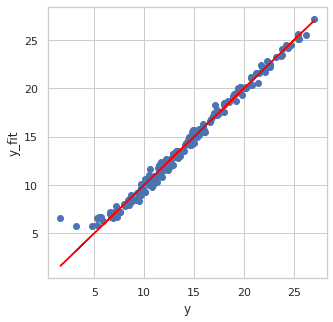

In [10]:
from sklearn.preprocessing import PolynomialFeatures
ads = pd.read_csv("https://www.palmetto.clemson.edu/dsci/datasets/isl/Advertising.csv")

X, y = ads[["TV", "radio"]], ads['sales']

poly = PolynomialFeatures(degree=2, include_bias=True)
X2 = poly.fit_transform(X)

model = LinearRegression()
model.fit(X2, y)
yfit = model.predict(X2)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(y, yfit)
ax.set_xlabel('y')
ax.set_ylabel('y_fit')
ax.plot(y, y, color='red')

## Pipeline

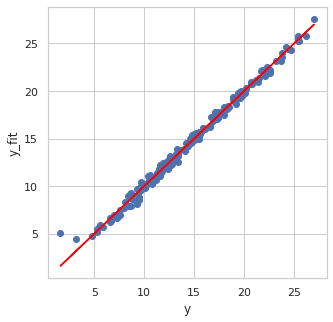

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
ads = pd.read_csv("https://www.palmetto.clemson.edu/dsci/datasets/isl/Advertising.csv")

X, y = ads[["TV", "radio"]], ads['sales']

# poly = PolynomialFeatures(degree=2, include_bias=True)
# X2 = poly.fit_transform(X)
# model = LinearRegression()

model = make_pipeline(PolynomialFeatures(degree=2, include_bias=True), LinearRegression())

model.fit(X2, y)
yfit = model.predict(X2)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(y, yfit)
ax.set_xlabel('y')
ax.set_ylabel('y_fit')
ax.plot(y, y, color='red')

# Part B. Linear Regression Using statsmodels

## Using statsmodels.api

In [12]:
import statsmodels.api as sm
ads = pd.read_csv("Advertising.csv")
X, y = ads[["TV", "radio"]], ads['sales']
model = sm.OLS(y, X).fit()
model.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0548,0.001,42.962,0.000,0.052,0.057
radio,0.2356,0.008,29.909,0.000,0.220,0.251


## Using statsmodels.formula.api

statsmodels.formula.api provides a convenience interface for specifying models using formula strings and DataFrames. This API directly exposes the from_formula class method of models that support the formula API.

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
ads = pd.read_csv("Advertising.csv")
model = smf.ols('sales ~ TV + radio', data=ads).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9211,0.294,9.919,0.000,2.340,3.502
TV,0.0458,0.001,32.909,0.000,0.043,0.048
radio,0.1880,0.008,23.382,0.000,0.172,0.204


In [15]:
model2 = smf.ols('sales ~ TV + radio + TV:radio', data=ads).fit()
model2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


# Seaborn regplot

In [21]:
datafile = "http://www.palmetto.clemson.edu/dsci/datasets/isl/Auto.csv"
auto = pd.read_csv(datafile)
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [28]:
## Drop samples with missing values
auto = pd.read_csv(datafile, na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


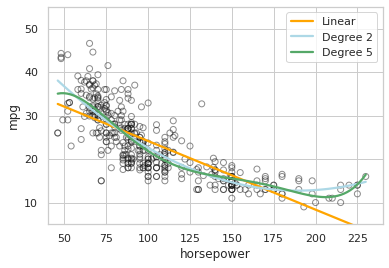

In [29]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
plt.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k', alpha=.5) 
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 5', order=5, scatter=False, color='g')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

In [31]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

auto['horsepower2'] = auto.horsepower**2
model = smf.ols('mpg ~ horsepower + horsepower2', auto).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
horsepower2,0.0012,0.000,10.080,0.000,0.001,0.001
